In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [2]:
value_counts=df['number'].value_counts()

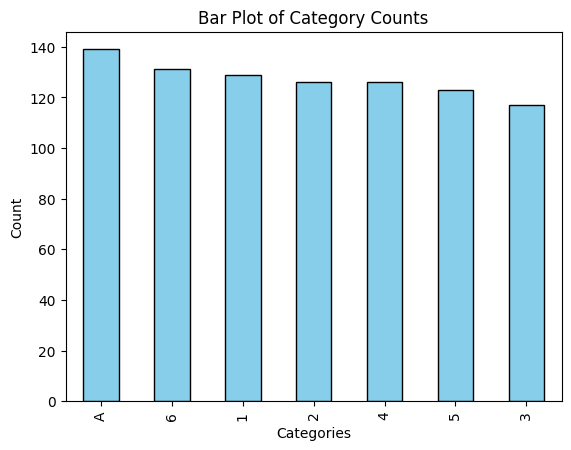

In [3]:
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Add labels and title
plt.title('Bar Plot of Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

In [4]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [5]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [6]:
df.sample(5)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
57,NaN,2697,A,0,NaN,A
305,C22 C26,113781,6,1,6.0,NaN
79,NaN,364516,A,1,NaN,A
386,NaN,CA 2144,6,0,6.0,NaN
348,NaN,C.A. 37671,2,1,2.0,NaN


In [7]:

df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

In [8]:
df.sample(5)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
615,NaN,220845,A,1,NaN,A,NaN,NaN
54,B30,113509,3,0,3.0,NaN,30,B
484,B49,11967,A,1,NaN,A,49,B
616,NaN,347080,4,0,4.0,NaN,NaN,NaN
387,NaN,27849,4,1,4.0,NaN,NaN,NaN


In [9]:
# df.fillna(0,inplace=True)

In [10]:
df.sample(6)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
525,NaN,367232,3,0,3.0,NaN,NaN,NaN
676,NaN,342826,3,0,3.0,NaN,NaN,NaN
72,NaN,S.O.C. 14879,3,0,3.0,NaN,NaN,NaN
455,NaN,349240,5,1,5.0,NaN,NaN,NaN
643,NaN,1601,A,1,NaN,A,NaN,NaN
692,NaN,1601,4,1,4.0,NaN,NaN,NaN


<Axes: >

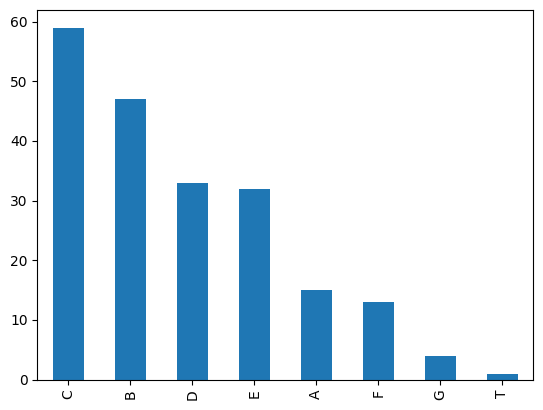

In [11]:
 df['cabin_cat'].value_counts().plot(kind="bar")

In [13]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

In [14]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
